### 코랩에서 kaggle dataset 사용하는 방법
[https://soohee410.github.io/colab_kaggle](https://soohee410.github.io/colab_kaggle)

[https://kubig-2021-2.tistory.com/35](https://kubig-2021-2.tistory.com/35)

In [1]:
# kaggle 설치
!pip install kaggle
from google.colab import files
files.upload() # kaggle.json 업로드

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ekgus8742","key":"5393e45f6d388a5298f9ea0a3eff33e1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# 데이터셋 다운로드
!kaggle datasets download -d harperd17/mushroom-pictures

 55% 31.0M/56.1M [00:00<00:00, 321MB/s]
100% 56.1M/56.1M [00:00<00:00, 324MB/s]


In [4]:
# 데이터셋 압축 해제
!unzip mushroom-pictures.zip

Archive:  mushroom-pictures.zip
  inflating: All_Mushroom_Data/Amanita bisporigera/100598.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100599.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100600.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100626.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100628.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100629.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100630.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100631.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101388.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101389.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101528.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101529.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101751.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101752.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101753.jpg  
  inflat

In [5]:
!ls

All_Mushroom_Data  kaggle.json	mushroom-pictures.zip  sample_data


In [6]:
# 라이브러리를 한 번에 import
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn # 손실, 활성화 함수, 신경망 생성을 위한 풀링 함수 포함
from torch import optim # optimizer
import torch.nn.functional as F
from torchvision import datasets, transforms, models

from torchvision import transforms
from torchvision import datasets

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import random
import shutil

In [7]:
import os
from os import path
import glob

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
# pre-trained model 불러오기
# 이미지 분류 문제를 해결할 수 있도록 규모가 큰 데이터로 미리 학습된 모델
model = models.resnet152(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
# 디렉토리리 이름을 변수로 사용할 수 있도록 중간에 있는 공백 '_'가 되도록 디렉토리 이름 수정
%cd /content/All_Mushroom_Data

!mv 'Amanita bisporigera' 'Amanita_bisporigera'
!mv 'Boletus edulis' 'Boletus_edulis'
!mv	'Omphalotus olearius' 'Omphalotus_olearius'
!mv 'Amanita muscaria' 'Amanita_muscaria'
!mv 'Russula mariae' 'Russula_mariae'

%cd ..

/content/All_Mushroom_Data
/content


In [10]:
mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']
path = '/content/All_Mushroom_Data'

# 각각 디렉토리 내에 있는 파일들을 리스트에 저장
Amanita_bisporigera = glob.glob(path+'/Amanita_bisporigera'+'/*')
Amanita_muscaria = glob.glob(path+'/Amanita_muscaria'+'/*')
Boletus_edulis = glob.glob(path+'/Boletus_edulis'+'/*')
Cantharellus = glob.glob(path+'/Cantharellus'+'/*')
Omphalotus_olearius = glob.glob(path+'/Omphalotus_olearius'+'/*')
Russula_mariae = glob.glob(path+'/Russula_mariae'+'/*')

In [11]:
# 원본 dataset의 이미지 개수 출력
sum = 0
for elem in mushrooms:
  elem_name = elem
  elem_list = globals()[elem]
  print(f'{elem_name} 이미지 개수: {len(elem_list)}개')
  sum += len(elem_list)
print(f'총 이미지 개수: {sum}')

Amanita_bisporigera 이미지 개수: 606개
Amanita_muscaria 이미지 개수: 367개
Boletus_edulis 이미지 개수: 444개
Cantharellus 이미지 개수: 1183개
Omphalotus_olearius 이미지 개수: 59개
Russula_mariae 이미지 개수: 235개
총 이미지 개수: 2894


In [12]:
# train, valid, test 폴더 생성
!mkdir train
!mkdir valid
!mkdir test

In [13]:
# train, valid, test 폴더 안에 각각 클래스별 하위 폴더 생성
%cd /content/test
for mushroom in mushrooms:
  os.mkdir(mushroom)

%cd /content/train
for mushroom in mushrooms:
  os.mkdir(mushroom)  

%cd /content/valid
for mushroom in mushrooms:
  os.mkdir(mushroom)

/content/test
/content/train
/content/valid


In [14]:
# 본격적으로 data split을 하기 전에 test, valid 데이터셋에 몇 장이 들어가는지 계산하여 출력

# valid dataset
valid_ratio = 0.2
Amanita_bisporigera_valid_count = round(len(Amanita_bisporigera)*valid_ratio)
Amanita_muscaria_valid_count = round(len(Amanita_muscaria)*valid_ratio)
Boletus_edulis_valid_count = round(len(Boletus_edulis)*valid_ratio)
Cantharellus_valid_count = round(len(Cantharellus)*valid_ratio)
Omphalotus_olearius_valid_count = round(len(Omphalotus_olearius)*valid_ratio)
Russula_mariae_valid_count = round(len(Russula_mariae)*valid_ratio)

for elem in mushrooms:
  print(f'{elem} valid 파일에 들어가는 이미지 개수:', end= ' ')
  print(globals()[elem+'_valid_count'], end=' / ')
  print(len(globals()[elem]))

print('\n')

# test dataset
test_ratio = 0.2
Amanita_bisporigera_test_count = round(len(Amanita_bisporigera)*test_ratio)
Amanita_muscaria_test_count = round(len(Amanita_muscaria)*test_ratio)
Boletus_edulis_test_count = round(len(Boletus_edulis)*test_ratio)
Cantharellus_test_count = round(len(Cantharellus)*test_ratio)
Omphalotus_olearius_test_count = round(len(Omphalotus_olearius)*test_ratio)
Russula_mariae_test_count = round(len(Russula_mariae)*test_ratio)

for elem in mushrooms:
  print(f'{elem} test 파일에 들어가는 이미지 개수:', end= ' ')
  print(globals()[elem+'_test_count'], end=' / ')
  print(len(globals()[elem]))

Amanita_bisporigera valid 파일에 들어가는 이미지 개수: 121 / 606
Amanita_muscaria valid 파일에 들어가는 이미지 개수: 73 / 367
Boletus_edulis valid 파일에 들어가는 이미지 개수: 89 / 444
Cantharellus valid 파일에 들어가는 이미지 개수: 237 / 1183
Omphalotus_olearius valid 파일에 들어가는 이미지 개수: 12 / 59
Russula_mariae valid 파일에 들어가는 이미지 개수: 47 / 235


Amanita_bisporigera test 파일에 들어가는 이미지 개수: 121 / 606
Amanita_muscaria test 파일에 들어가는 이미지 개수: 73 / 367
Boletus_edulis test 파일에 들어가는 이미지 개수: 89 / 444
Cantharellus test 파일에 들어가는 이미지 개수: 237 / 1183
Omphalotus_olearius test 파일에 들어가는 이미지 개수: 12 / 59
Russula_mariae test 파일에 들어가는 이미지 개수: 47 / 235


In [16]:
# train, valid, test 데이터셋을 나누는 함수
# img_list - 버섯 이미지 파일 리스트
# test_count - test dataset에 들어가는 이미지 개수
# valid_count - valid dataset에 들어가는 이미지 개수
# train_path - train dataset의 경로
# test_path - test dataset의 경로
# valid_path - valid dataset의 경로

def split(img_list, test_count, valid_count, train_path, test_path, valid_path):
  # image shuffle
  np.random.shuffle(img_list)

  test_files=[]
  valid_files=[]

  # test dataset 분리
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # test dataset에 포함되지 않은 data -> not_test_files (train + valid)
  # not_test_files에서 20%는 valid dataset, 60%는 train dataset으로 분리
  not_test_files = [x for x in img_list if x not in test_files]

  for i in random.sample(not_test_files, valid_count):
    valid_files.append(i)

  train_files = [x for x in not_test_files if x not in valid_files]

  # split한 data들을 train, test, valid 폴더로 복사
  for k in train_files:
    shutil.copy(k, train_path)

  for c in test_files:
    shutil.copy(c, test_path)

  for v in valid_files:
    shutil.copy(v, valid_path)

  print('train 폴더 이미지 개수: {}\nvalid 폴더 이미지 개수: {}\ntest 폴더 이미지 개수: {}\n'.format(len(glob.glob(train_path+'/*')), len(glob.glob(valid_path+'/*')), len(glob.glob(test_path+'/*'))))

In [17]:
mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']

for elem in mushrooms:
  globals()[elem+'_train_path'] = '/content/train/{}'.format(elem)
  globals()[elem+'_valid_path'] = '/content/valid/{}'.format(elem)
  globals()[elem+'_test_path'] = '/content/test/{}'.format(elem)
  split(globals()[elem], globals()[elem+'_test_count'], globals()[elem+'_valid_count'], globals()[elem+'_train_path'], globals()[elem+'_test_path'], globals()[elem+'_valid_path'])

train 폴더 이미지 개수: 364
valid 폴더 이미지 개수: 121
test 폴더 이미지 개수: 121

train 폴더 이미지 개수: 221
valid 폴더 이미지 개수: 73
test 폴더 이미지 개수: 73

train 폴더 이미지 개수: 266
valid 폴더 이미지 개수: 89
test 폴더 이미지 개수: 89

train 폴더 이미지 개수: 709
valid 폴더 이미지 개수: 237
test 폴더 이미지 개수: 237

train 폴더 이미지 개수: 35
valid 폴더 이미지 개수: 12
test 폴더 이미지 개수: 12

train 폴더 이미지 개수: 141
valid 폴더 이미지 개수: 47
test 폴더 이미지 개수: 47



In [18]:
train_path = '/content/train'
test_path = '/content/test'
valid_path = '/content/valid'

# 이미지 resize
resize_trans = transforms.Compose([transforms.Resize((224, 224)),
                                  transforms.ToTensor(),
                                  ])

resize_train = datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = datasets.ImageFolder(root=test_path, transform=resize_trans)
resize_valid = datasets.ImageFolder(root=valid_path, transform=resize_trans)

In [19]:
# data normaliztion
def get_mean_std(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

  mean = [meanR, meanG, meanB]
  std = [stdR, stdG, stdB]

  return mean, std

##아래 normalize 과정에서의 에러 해결 방안##
아래 train, test, valid dataset에 대하여 normalize를 진행할 때, 에러가 발생할 수 있다.
이 때, 에러 메시지를 확인하여 test/valid/train 폴더 중 어느 폴더에서 에러가 났는지 확인한다.
그리고, 아래 Cantharellus에
다운받은 사진(587054.jpg)을 수동으로 추가해준다.  
<아래의 사진 = 587054>
(간혹 아래 사진을 저장할 때, jpeg로 저장될 때가 있는데, 수동 업로드 시 jpg를 업로드해주어야 함을 주의한다.)

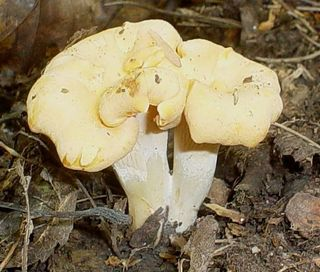

In [21]:
resize_train_mean, resize_train_std = get_mean_std(resize_train)

0.4053268 0.36167157 0.28089628
0.22373006 0.20798823 0.18915252


In [22]:
resize_valid_mean, resize_valid_std = get_mean_std(resize_valid)

0.40501618 0.36043102 0.2811743
0.22487128 0.20903829 0.19084011


In [23]:
resize_test_mean, resize_test_std = get_mean_std(resize_test)

0.4069117 0.36336526 0.27971458
0.22570795 0.20984697 0.19010942


In [24]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)), # 이미지 resize
    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_valid = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_valid_mean, resize_valid_std)
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = datasets.ImageFolder(root=train_path, transform=transform_train)
validset = datasets.ImageFolder(root=valid_path, transform=transform_valid)
testset = datasets.ImageFolder(root=test_path, transform=transform_test)

# hyperparameter - batch size를 변경할 수 있는 부분
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=0)

validloader = torch.utils.data.DataLoader(validset, batch_size=256,
                                         shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=True, num_workers=0)

In [25]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.shape

torch.Size([256, 3, 224, 224])

In [26]:
# Freeze network
for param in model.parameters():
    param.requires_grad = False

# 순서를 갖는 모듈의 컨테이너
# 정의된 것과 같은 순서로 모든 모듈들을 통해 전달 -> 신경망을 빠르게 제작
# 참고: https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
# nn.Linear(input_dim, output_dim)
# nn.ReLu() - 선형 변환 후에 적용되어 비선형성을 도입
# nn.Dropout() - dropout layer를 추가
# nn.LogSoftmax - 신경망의 마지막 선형 계층을 전달받아 logits을 반환

# 데이터셋의 클래스 개수
num_classes = 6

model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(512, num_classes),
                                 nn.LogSoftmax(dim=1)
                                )
# loss function
criterion = torch.nn.CrossEntropyLoss()

# 이전에 시도했던 optimizer과 scheduler - 보고서 작성 시 대조군 필요하면 사용 !!

optimizer = optim.Adam(model.fc.parameters(), lr=0.003, weight_decay=0.0)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', patience=3)
# scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: 0.9 ** epoch)
model.to(device) # NeuralNetwork의 인스턴스를 생성하고 이를 device로 이동한 뒤, 구조를 출력

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [27]:
epochs = 20
steps = 0
running_loss = 0
print_every = 20
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    if(epoch > 4): optimizer.param_groups[0]["lr"] *= 0.9
    print(f'lr: {optimizer.param_groups[0]["lr"]:.5f}')
    epoch_loss = 0
    epoch_accuracy = 0
    epoch_val_accuracy = 0
    epoch_val_loss = 0

    for data, label in trainloader:
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(trainloader)
        epoch_loss += loss / len(trainloader)

    if steps % print_every == 0:
      with torch.no_grad():

          for data, label in validloader:
              data = data.to(device)
              label = label.to(device)

              val_output = model(data)
              val_loss = criterion(val_output, label)

              acc = (val_output.argmax(dim=1) == label).float().mean()
              epoch_val_accuracy += acc / len(validloader)
              epoch_val_loss += val_loss / len(validloader)
              
      
      print(
          f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
      )
      model.train()

      train_losses.append(epoch_loss)
      val_losses.append(epoch_val_loss)
      train_accs.append(epoch_accuracy)
      val_accs.append(epoch_val_accuracy)
      
    print('\n')

torch.save(model, 'aerialmodel.pth')

lr: 0.00300
Epoch : 1 - loss : 3.2180 - acc: 0.2951 - val_loss : 1.5741 - val_acc: 0.4067



lr: 0.00300
Epoch : 2 - loss : 1.2815 - acc: 0.5540 - val_loss : 1.0315 - val_acc: 0.6640



lr: 0.00300
Epoch : 3 - loss : 0.9018 - acc: 0.7131 - val_loss : 0.7795 - val_acc: 0.7908



lr: 0.00300
Epoch : 4 - loss : 0.6867 - acc: 0.7838 - val_loss : 0.6413 - val_acc: 0.7943



lr: 0.00300
Epoch : 5 - loss : 0.5474 - acc: 0.8277 - val_loss : 0.6000 - val_acc: 0.8134



lr: 0.00270
Epoch : 6 - loss : 0.4736 - acc: 0.8550 - val_loss : 0.5856 - val_acc: 0.7881



lr: 0.00243
Epoch : 7 - loss : 0.4268 - acc: 0.8710 - val_loss : 0.4573 - val_acc: 0.8589



lr: 0.00219
Epoch : 8 - loss : 0.3618 - acc: 0.8766 - val_loss : 0.4876 - val_acc: 0.8149



lr: 0.00197
Epoch : 9 - loss : 0.3407 - acc: 0.8922 - val_loss : 0.3991 - val_acc: 0.8861



lr: 0.00177
Epoch : 10 - loss : 0.3061 - acc: 0.9039 - val_loss : 0.4695 - val_acc: 0.8253



lr: 0.00159
Epoch : 11 - loss : 0.2949 - acc: 0.9087 - val_loss : 0.3

[tensor(3.2180, device='cuda:0', grad_fn=<AddBackward0>), tensor(1.2815, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.9018, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.6867, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.5474, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.4736, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.4268, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.3618, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.3407, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.3061, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2949, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2764, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2612, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2510, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2446, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2260, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2278, device='cuda:0', grad_fn=<AddBackward0>), tensor(0.2122, device='cuda:0'

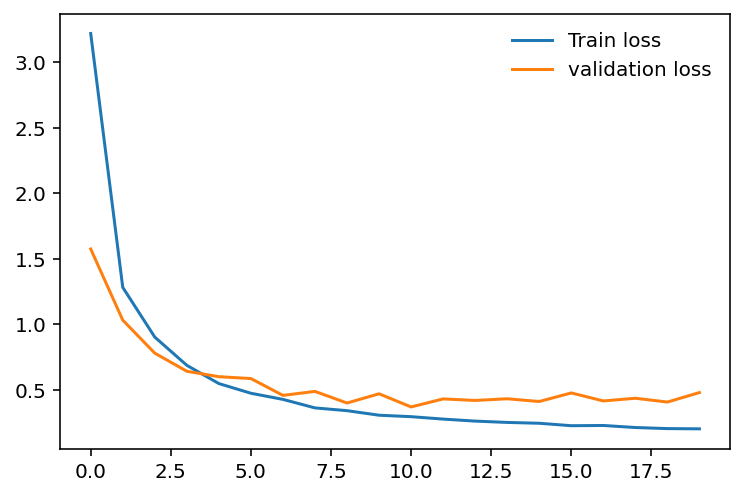

In [29]:
import matplotlib.pyplot as plt

print(train_losses)
print(val_losses)

# 만약 위 print문으로 출력했을 때 원소들이 float가 아니면 아래 두 줄 주석 해제한다.

train_losses = [elem.item() for elem in train_losses]
val_losses = [elem.item() for elem in val_losses]
plt.plot(train_losses, label='Train loss')
plt.plot(val_losses, label='validation loss')
plt.legend(frameon=False)
plt.show()

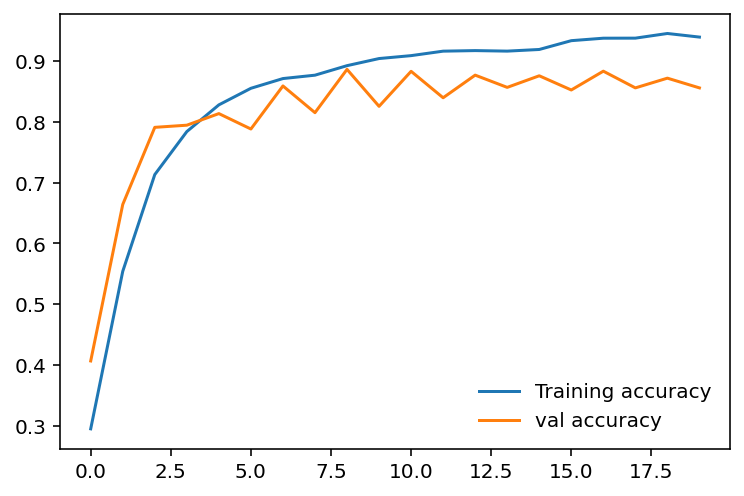

In [36]:
#train_accs = [elem.item() for elem in train_accs]
#val_accs = [elem.item() for elem in val_accs]
plt.plot(train_accs, label='Training accuracy')
plt.plot(val_accs, label='val accuracy')
plt.legend(frameon=False)
plt.show()

In [37]:
test_dir = "/content/test/"
test_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [45]:
#Test Accuarcy 출력 과정#

accuracy = 0.0
    
with torch.no_grad():
    for data,label in testloader:
        data = data.to(device)
        label = label.to(device)
        outputs = model(data)
        acc = (outputs.argmax(dim=1) == label).float().mean()
        accuracy += acc / len(testloader)

print(f"accuracy: {accuracy:.4f}\n")

accuracy: 0.8624



In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('aerialmodel.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [47]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = image_tensor
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [48]:
def get_random_images(num):
    data = datasets.ImageFolder(test_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

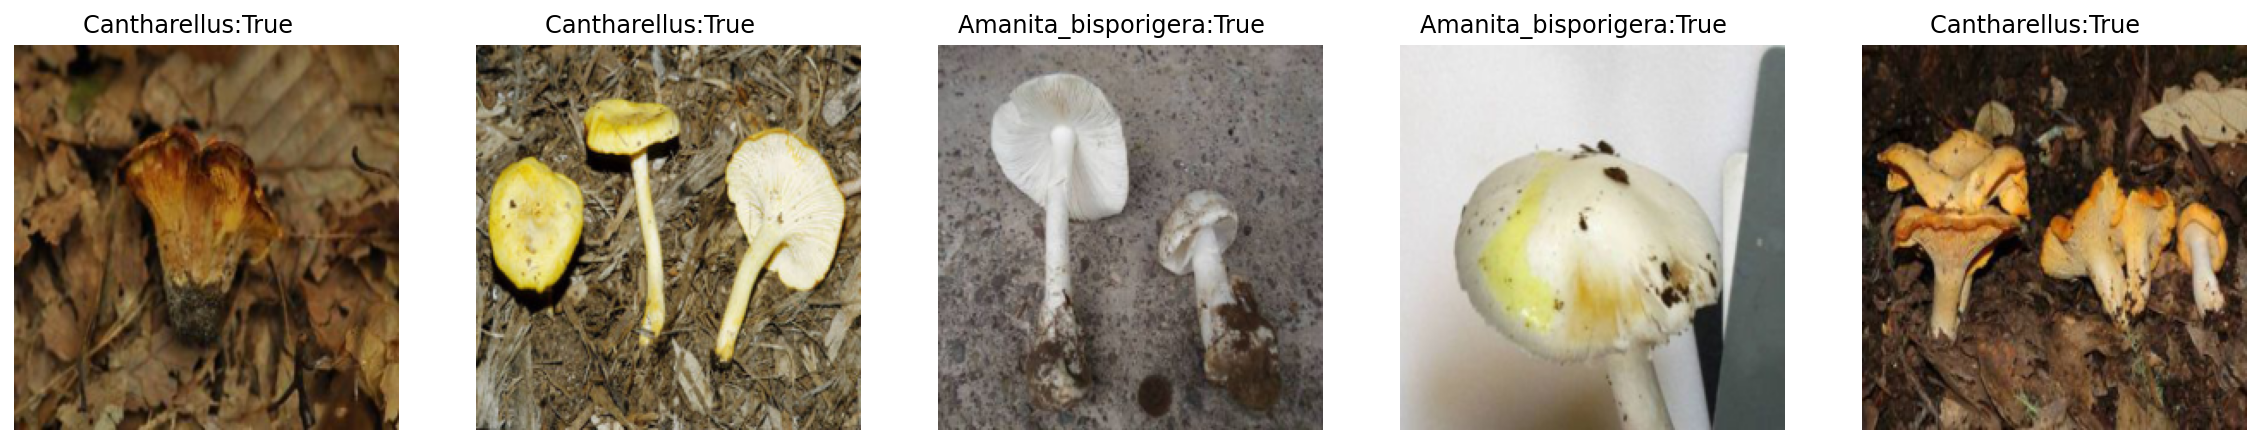

In [51]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import os
classes = trainloader.dataset.classes
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig=plt.figure(figsize=(20,20))

for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res) + "     ")
    plt.axis('off')
    plt.imshow(image)
    draw =ImageDraw.Draw(image)

plt.show()

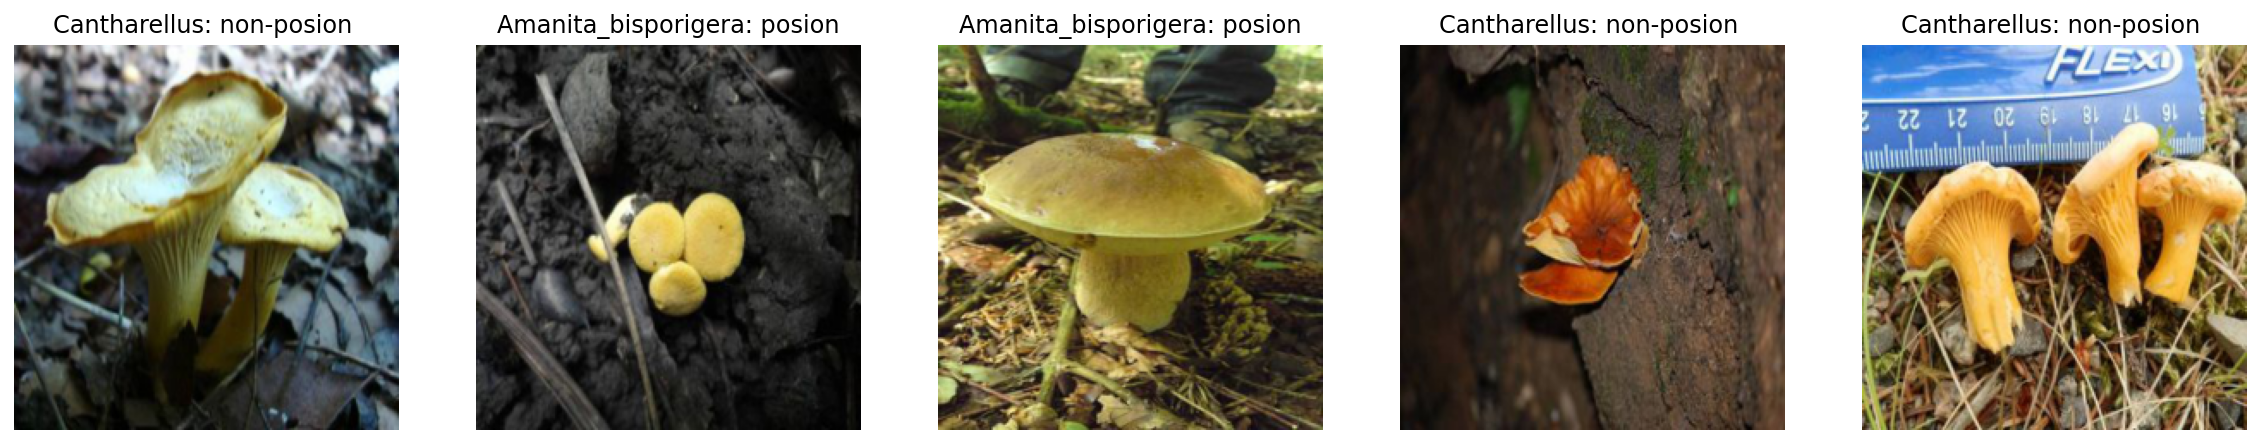

In [53]:
classes = trainloader.dataset.classes
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig=plt.figure(figsize=(20,20))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    # sub.set_title(str(classes[index]) + ":" + str(res) + "     ")
    plt.axis('off')
    plt.imshow(image)
    if (classes[index] == ('Amanita_bisporigera')): 
      sub.set_title(str(classes[index]) + ": " + "posion")
    elif(classes[index] =='Amanita_muscaria'):
      sub.set_title(str(classes[index]) + ": " + "posion")
    elif(classes[index] =='Boletus_edulis'):
      sub.set_title(str(classes[index]) + ": " + "posion")
    elif(classes[index] =='Omphalotus_olearius'):
      sub.set_title(str(classes[index]) + ": " + "posion")  
    elif(classes[index] =='Russula_mariae'):
      sub.set_title(str(classes[index]) + ": " + "posion")            
    elif(classes[index] =='Cantharellus'):
      sub.set_title(str(classes[index]) + ": " + "non-posion ")
plt.show()